<h2><center>ASSIGNMENT 1</center></h2>
<h2><center>NAME: DEEP ASHISH JARIWALA</center></h2>
<h2><center>SID: 20909290</center></h2>
<h2><center>Q: CM6</center></h2>

## HEART DISEASE DATASET

#### IMPORTING LIBRARIES

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from mlxtend.plotting import plot_confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

#### IMPORTING THE DATASET

In [47]:
dataset = pd.read_csv("heart_disease_missing.csv")
dataset['thal'] = dataset['thal'].round()

#### SEPERATING THE DATASET INTO FEATURES AND TARGETS

In [48]:
dataset_features = dataset.iloc[:,:-1]
dataset_target = dataset.iloc[:, -1].values

#### ONE HOT-ENCODING FOR CATEGORICAL VARIABLES

In [49]:
a = pd.get_dummies(dataset_features['cp'], prefix = "cp")
b = pd.get_dummies(dataset_features['thal'], prefix = "thal")
c = pd.get_dummies(dataset_features['slope'], prefix = "slope")

frames = [dataset_features, a, b, c]
dataset_features = pd.concat(frames, axis = 1)

#### DEALING WITH MISSING VALUES

In [50]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean = imp_mean.fit(dataset_features)
dataset_features = imp_mean.transform(dataset_features)

<p>All the missing values of the numeric features i.e., NaN values, are replaced by the particular feature's mean in the dataset. The method used to replace the missing values with mean is SimpleInputer. It finds all the nan values and replaces then with the mean of that column. The final shape of the dataset will be a numpy array of dimension <i>(212,23)</i></p> 

#### DATASET PREPARATION BEFORE TRAINING

In [51]:
X_train, X_sep, y_train, y_sep = train_test_split(dataset_features, dataset_target, test_size = 0.4, random_state = 275)
X_test, X_val, y_test, y_val = train_test_split(X_sep, y_sep, test_size = 0.5, random_state = 275)

<ul>
            <li>Using the sklearn train_test_split method twice, the numpy arrays are splitted into train,test and validation                   set(60%,20%,20%).</li>
            <li><i>X_train shape = (127, 23)</i></li>
            <li><i>X_test and X_val shape = (43, 23)</i></li>
            <li><i>y_train shape = (127,1)</i></li>
            <li><i>y_test and y_val shape = (43,1)</i></li>
</ul>

#### TRAINING ON DEFAULT PARAMETERS

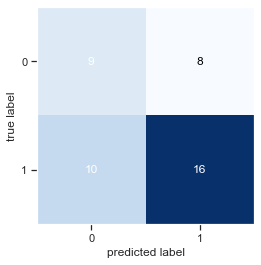

The accuracy score of KNN algorithm at default parameters: 58.139534883720934%
The F1 score of KNN algorithm at default parameters: 64.0%


In [52]:
knn_validation = KNeighborsClassifier()
knn_validation.fit(X_train, y_train)

y_pred = knn_validation.predict(X_val)

cm = confusion_matrix(y_val, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()
print(f"The accuracy score of KNN algorithm at default parameters: {accuracy_score(y_val, y_pred)*100}%")
print(f"The F1 score of KNN algorithm at default parameters: {f1_score(y_val, y_pred)*100}%")

<p>The model is trained based on the default parameters provided by the KNeighborsClassifier i.e. [k = 5, weights = uniform and p = 2 (euclidean_distance)] and it obtained an accuracy of 58.14% on validation set. The conclusion obtained from confusion matrix is that the algorithm is confused in classification of both the targets.</p>

#### CHECKING ACCURACY FOR DIFFERENT VALUES OF K

Text(0.5, 1.0, 'K-NN at different values of K')

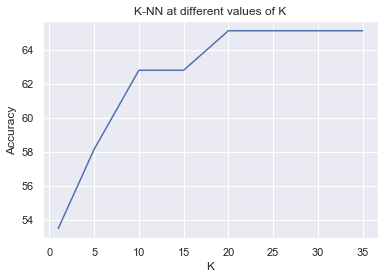

In [53]:
k_val = [1,5,10,15,20,25,30,35]
accuracy = []

for k in k_val:
        knn1 = KNeighborsClassifier(n_neighbors=k)
        knn1.fit(X_train, y_train)
        y_pred = knn1.predict(X_val)
        scr = accuracy_score(y_val, y_pred)
        accuracy.append(scr*100)
# classification v/s accuracy curve to report the best value of K
plt.plot(k_val, accuracy)
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.title("K-NN at different values of K")

<p>The above box shows the variation of k (nearest neighbors) to the model's accuracy on the validation set. The table below shows the comparison of accuracy at different values of k.</p>
<table>
  <tr>
    <th>K</th>
    <th>Accuracy</th>
  </tr>
  <tr>
    <td>1</td>
    <td>53.48%</td>
  </tr>
    <tr>
    <td>5</td>
    <td>58.14%</td>
  </tr>
    <tr>
    <td>10</td>
    <td>62.80%</td>
  </tr>
    <tr>
    <td>15</td>
    <td>62.80%</td>
  </tr>
    <tr>
    <td>20</td>
    <td>65.12%</td>
  </tr>
     <tr>
    <td>25</td>
    <td>65.12%</td>
  </tr>
     <tr>
    <td>30</td>
    <td>65.12%</td>
  </tr>
     <tr>
    <td>35</td>
    <td>65.12%</td>
  </tr>
</table>
<p>Therefore, at k = 20 we have obtained the best accuracy of 65.12% which will be selected as the best parameter for test set.</p>

<h2><center>ASSIGNMENT 1</center></h2>
<h2><center>NAME: DEEP ASHISH JARIWALA</center></h2>
<h2><center>SID: 20909290</center></h2>
<h2><center>Q: CM7</center></h2>

#### TESTING ON TEST SET WITH DEFAULT PARAMETERS

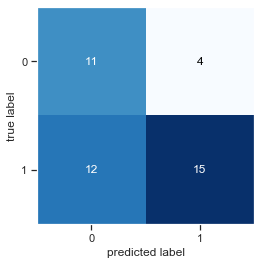

The accuracy score of KNN algorithm at default parameters on test set: 61.904761904761905%
The F1 score of KNN algorithm at default parameters on test set: 65.21739130434783%


In [54]:
knn_validation = KNeighborsClassifier()
knn_validation.fit(X_train, y_train)

y_pred = knn_validation.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()
print(f"The accuracy score of KNN algorithm at default parameters on test set: {accuracy_score(y_test, y_pred)*100}%")
print(f"The F1 score of KNN algorithm at default parameters on test set: {f1_score(y_test, y_pred)*100}")

<p>Based on the current score, it seems that model can be improved by varying the default paramters of KNN (p, weights). Another scope of improvement can be made by using normaliztion techniques on the dataset. The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values.</p>

Text(0.5, 1.0, 'K-NN at different distance metrics')

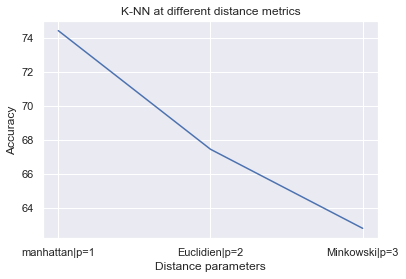

In [55]:
# testing on different distance metrics for the perfect model
# p = 1 manhattan, p = 2 eucliden, p = random minkowski
dist = ['manhattan|p=1', 'Euclidien|p=2', 'Minkowski|p=3']
accy = []
for i in range(1,4):
    knn_dist = KNeighborsClassifier(n_neighbors=20, weights='distance', p=i)
    knn_dist.fit(X_train, y_train)

    y_pred_dist = knn_dist.predict(X_val)
    score = accuracy_score(y_val, y_pred_dist)
    accy.append(score*100)

plt.plot(dist,accy)
plt.xlabel("Distance parameters")
plt.ylabel("Accuracy")
plt.title("K-NN at different distance metrics")

<p>The above box shows the variation of p (distance metric) to the model's accuracy on the validation set. The table below shows the comparison of accuracy at different values of p.</p>
<table>
  <tr>
    <th>Distance metric</th>
    <th>Accuracy</th>
  </tr>
  <tr>
    <td>p=1|Manhattan</td>
    <td>74.42%</td>
  </tr>
    <tr>
    <td>p=2|Euclidean</td>
    <td>67.44%</td>
  </tr>
     <tr>
    <td>p=random|Minkowski</td>
    <td>62.79%</td>
  </tr>
</table>
<p>The accuracy is highest for manhattan followed by Euclidean.</p>

#### SCALING THE DATASET USING STANDARD SCALER

In [56]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)
X_val_scaled = sc.transform(X_val)

<p>Standard Scaler is used as a standardization technique, as it organizes the data in such a way that it is distributed normally (Gaussian with 0 mean and unit variance)</p>

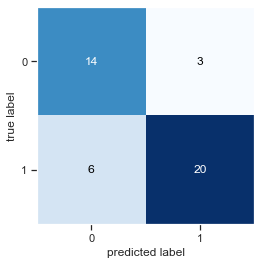

The accuracy score of KNN algorithm at the best parameters on validation set after normalization: 79.06976744186046%
The F1 score of KNN algorithm at the best parameters on validation set after normalization: 81.63265306122449%


In [57]:
knn_normalized_1 = KNeighborsClassifier(n_neighbors=20, weights='distance', p=1)
knn_normalized_1.fit(X_train_scaled, y_train)

y_pred = knn_normalized_1.predict(X_val_scaled)

cm = confusion_matrix(y_val, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()
print(f"The accuracy score of KNN algorithm at the best parameters on validation set after normalization: {accuracy_score(y_val, y_pred)*100}%")
print(f"The F1 score of KNN algorithm at the best parameters on validation set after normalization: {f1_score(y_val, y_pred)*100}")

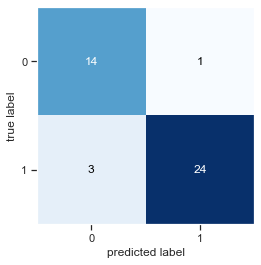

The accuracy score of KNN algorithm at the best parameters on test set after normalization: 90.47619047619048%
The F1 score of KNN algorithm at the best parameters on test set after normalization: 92.3076923076923%


In [58]:
knn_normalized = KNeighborsClassifier(n_neighbors=20, weights='distance', p=1)
knn_normalized.fit(X_train_scaled, y_train)

y_pred = knn_normalized.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()
print(f"The accuracy score of KNN algorithm at the best parameters on test set after normalization: {accuracy_score(y_test, y_pred)*100}%")
print(f"The F1 score of KNN algorithm at the best parameters on test set after normalization: {f1_score(y_test, y_pred)*100}")

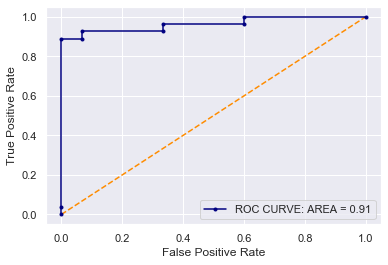

The Area under the curve - AUC score for the model on the best parameters: 91.11111111111111


In [59]:
#ROC Curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#probabilities
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = knn_normalized.predict_proba(X_test_scaled)
lr_probs = lr_probs[:, 1]

ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, color='darkorange', linestyle='--')
plt.plot(lr_fpr, lr_tpr, color='navy', marker='.', label='ROC CURVE: AREA = 0.91')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# show the legend
plt.legend()

# show the plot
plt.show()

print(f'The Area under the curve - AUC score for the model on the best parameters: {roc_auc_score(y_test, y_pred)*100}')

<p>To conclude, Many variations were used to train the model and check the accuracy on validation set. The table below shows various aspects that were tested along with the accuracy obtained</p>
<table>
  <tr>
    <th>Paramters used</th>
    <th>Accuracy</th>
     <th>F1_score</th>
  </tr>
  <tr>
    <td>Default parameters|test_set</td>
    <td>61.90%</td>
    <td>65.21</td>
  </tr>
    <tr>
    <td>k=20|p=1|Manhattan|weights = distance|validation set</td>
    <td>74.42%</td>
  </tr>
     <tr>
    <td>k=20|p=1|Manhattan|weights = distance|standardization|validation set</td>
    <td>79.07%</td>
    <td>81.63</td>
  </tr>
    <tr>
    <td>k=20|p=1|Manhattan|weights = distance|standardization|testset</td>
    <td>90.48%</td>
    <td>92.30</td>
  </tr>
</table>
<p>The last column shows the final result that has an accuracy of 90.48%. Normalization and selection of distance metric has improved the model by a large factor. The overall accuracy has been improved to 90.48% from 61.90% on test set using the variations as shown in the above table.</p>